In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA

In [14]:
air_passenger = get_rdataset("AirPassengers").data["value"]
air_passenger

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

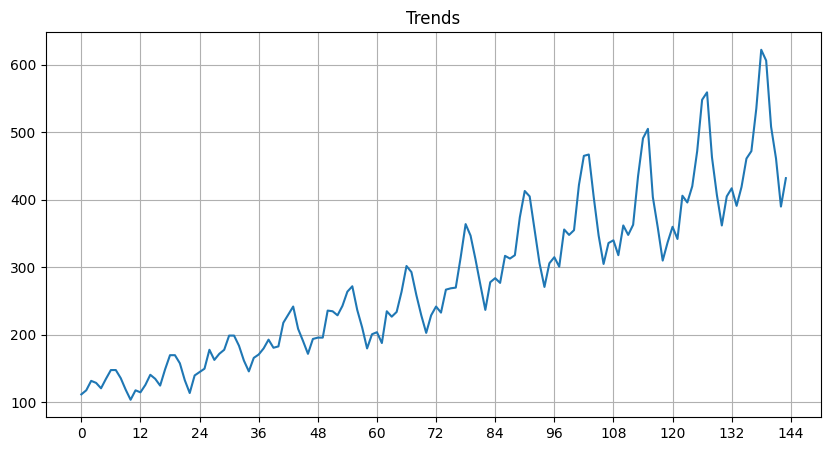

In [30]:
plt.figure(figsize=(10,5))
plt.plot(air_passenger)
plt.xticks(range(0,145,12))
plt.title("Trends")
plt.grid()
plt.show()

In [16]:
model = ARIMA(air_passenger,order=(4,3,4))

In [17]:
output = model.fit()

In [18]:
forecast = output.get_forecast(steps=12)

In [19]:
forecast.predicted_mean

144    475.350127
145    472.519179
146    477.270065
147    473.114511
148    479.887988
149    479.947182
150    484.600905
151    485.855634
152    488.760669
153    491.182715
154    492.880404
155    496.084564
Name: predicted_mean, dtype: float64

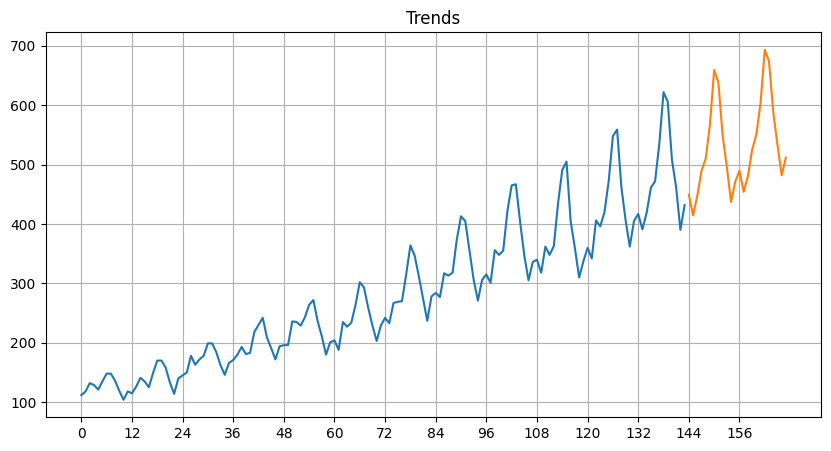

In [31]:
plt.figure(figsize=(10,5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0,157,12))
plt.title("Trends")
plt.grid()
plt.show()

In [21]:
error = output.aic
error

1398.6812241191326

In [22]:
best_order = None
min_aic = np.inf

In [24]:
for p in range(7,12):
    for d in range(1,5):
        for q in range(7,12):
            m = ARIMA(air_passenger,order=(p,d,q))
            out = m.fit()
            if out.aic < min_aic:
                min_aic = out.aic
                best_order = (p,d,q)

In [25]:
best_order

(11, 2, 7)

In [26]:
min_aic

1140.068743325428

In [28]:
model = ARIMA(air_passenger,order=best_order)
output=model.fit()
forecast=output.get_forecast(steps=24)

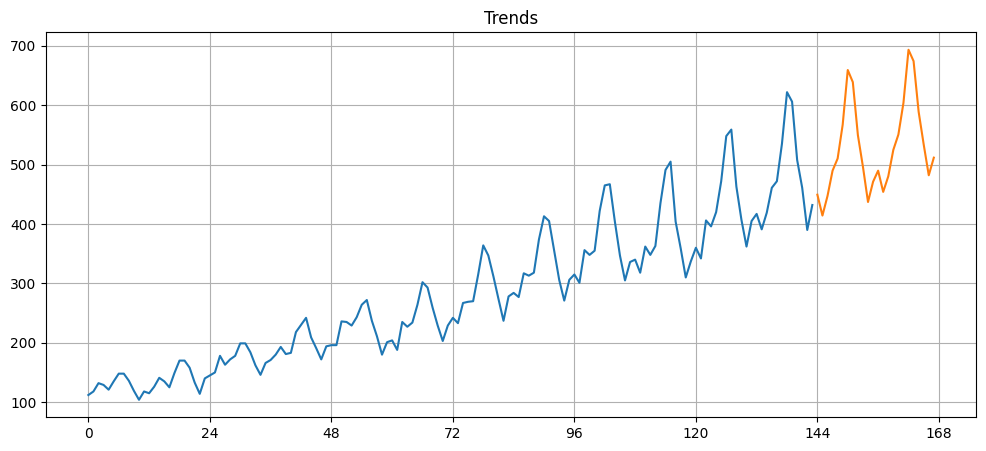

In [29]:
plt.figure(figsize=(12,5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0,169,24))
plt.title("Trends")
plt.grid()
plt.show()

In [32]:
forecast.predicted_mean

144    449.341728
145    414.257642
146    447.238744
147    489.852292
148    510.296080
149    567.306423
150    659.303224
151    638.905535
152    549.686503
153    496.328914
154    437.055844
155    471.165989
156    489.815465
157    454.086982
158    480.209866
159    524.847890
160    550.601288
161    603.957388
162    693.396858
163    674.320589
164    589.043873
165    533.899495
166    482.082140
167    511.733739
Name: predicted_mean, dtype: float64